Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

Data Collection & Processing

In [ ]:
!wget https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/calories.csv

--2024-07-25 14:22:38--  https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/calories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230245 (225K) [text/plain]
Saving to: ‘calories.csv’

calories.csv        100%[===================>] 224.85K  --.-KB/s    in 0.006s  

2024-07-25 14:22:38 (35.1 MB/s) - ‘calories.csv’ saved [230245/230245]



In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
!wget https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/exercise.csv

--2024-07-25 14:22:39--  https://raw.githubusercontent.com/javierjustin13/calories-burnt-prediction/main/exercise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553447 (540K) [text/plain]
Saving to: ‘exercise.csv’

exercise.csv        100%[===================>] 540.48K  --.-KB/s    in 0.009s  

2024-07-25 14:22:39 (60.3 MB/s) - ‘exercise.csv’ saved [553447/553447]



In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,NaN,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      14996 non-null  float64
 4   Weight      14995 non-null  float64
 5   Duration    14978 non-null  float64
 6   Heart_Rate  14848 non-null  float64
 7   Body_Temp   14865 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID         0
Gender          0
Age             0
Height          4
Weight          5
Duration       22
Heart_Rate    152
Body_Temp     135
Calories        0
dtype: int64

Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,14996.000000,14995.000000,14978.000000,14848.000000,14865.000000,15000.000000
mean,1.497736e+07,42.789800,174.466858,74.967456,15.536253,95.518588,40.024406,89.539533
std,2.872851e+06,16.980264,14.259507,15.034108,8.318342,9.579102,0.779444,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
mean_value = calories_data['Height'].mean()
std_dev = calories_data['Height'].std()
threshold = 2  # Adjust this threshold as needed

# Filter out values beyond the threshold
calories_data = calories_data[(calories_data['Height'] >= mean_value - threshold * std_dev) & (calories_data['Height'] <= mean_value + threshold * std_dev)]

In [ ]:
calories_data['Duration'] = calories_data.groupby(['Gender'])['Duration'].transform(lambda x: x.fillna(x.mean()))
calories_data['Heart_Rate'] = calories_data.groupby(['Gender'])['Heart_Rate'].transform(lambda x: x.fillna(x.mean()))
calories_data['Body_Temp'] = calories_data.groupby(['Gender'])['Body_Temp'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# menghapus sisa data yang null
calories_data = calories_data.dropna()

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14500 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     14500 non-null  int64  
 1   Gender      14500 non-null  object 
 2   Age         14500 non-null  int64  
 3   Height      14500 non-null  float64
 4   Weight      14500 non-null  float64
 5   Duration    14500 non-null  float64
 6   Heart_Rate  14500 non-null  float64
 7   Body_Temp   14500 non-null  float64
 8   Calories    14500 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


Converting the text data to numerical values

1. Positive Correlation
2. Negative Correlation

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-18-58112ca46fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [ ]:
correlation = calories_data.corr()

<Axes: >

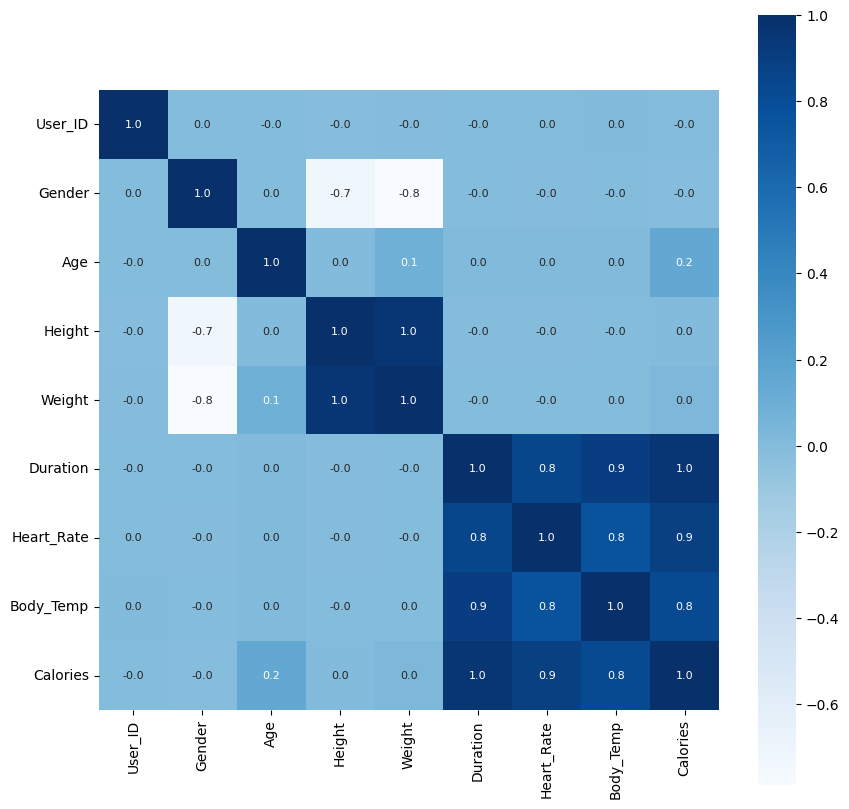

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.000000,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,95.465033,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.000000,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.000000,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.000000,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data[['Duration', 'Body_Temp', 'Heart_Rate']]
Y = calories_data['Calories']

In [ ]:
print(X)

       Duration  Body_Temp  Heart_Rate
0          29.0       40.8  105.000000
1          14.0       40.3   95.465033
2           5.0       38.7   88.000000
3          13.0       40.5  100.000000
4          10.0       39.8   81.000000
...         ...        ...         ...
14995      11.0       40.4   92.000000
14996       6.0       39.2   85.000000
14997      16.0       40.1   90.000000
14998       2.0       38.3   84.000000
14999      18.0       40.5   92.000000

[14500 rows x 3 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14500, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(14500, 3) (11600, 3) (2900, 3)


Model Training

In [ ]:
# loading the model
modelXGB = XGBRegressor(n_estimators=200, max_depth=2)
modelGBR = GradientBoostingRegressor(n_estimators=100, max_depth=3)
modelLinear = LinearRegression()
modelRF = RandomForestRegressor()
modelAda = AdaBoostRegressor()
modelExtraTrees = ExtraTreesRegressor()
# Stacking
estimators = [
    ('gbr', GradientBoostingRegressor(n_estimators=100, max_depth=3)),
    ('rf', RandomForestRegressor())
]
modelStacking = StackingRegressor(estimators=estimators,
    final_estimator=XGBRegressor(n_estimators=200, max_depth=2))

Finding best parameters for XGBoost Regressor using Grid Search

In [ ]:
# #menentukan nilai parameter untuk dilakukan Cross Validation
# parameter = {'max_depth': [2, 3, 4, 5],
#              'n_estimators': [50, 100, 150, 200]}

# #mencari kombinasi terbaik dari parameter yang telah ditentukan sebelumnya
# search = GridSearchCV(modelXGB, parameter, cv=5)
# search.fit(X_train, Y_train)

# print('Best Result: ', search.best_params_)
# print('Best Score : ', search.best_score_)

Finding best parameters for Gradient Boosting Regressor using Grid Search

In [ ]:
# parameter = {'max_depth': [2, 3, 4, 5],
#              'n_estimators': [50, 100, 150, 200]}

# search = GridSearchCV(modelGBR, parameter, cv=5)
# search.fit(X_train, Y_train)

# print('Best Result: ', search.best_params_) # untuk n_estimators tidak kami ikuti sesuai best score karena menyebabkan overfitting
# print('Best Score : ', search.best_score_)

In [ ]:
# training the model with X_train
modelXGB.fit(X_train, Y_train)
modelGBR.fit(X_train, Y_train)
modelLinear.fit(X_train, Y_train)
modelRF.fit(X_train, Y_train)
modelAda.fit(X_train, Y_train)
modelExtraTrees.fit(X_train, Y_train)
modelStacking.fit(X_train, Y_train)

StackingRegressor(estimators=[('gbr', GradientBoostingRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=2,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

Evaluation

Prediction on Test Data

In [ ]:
test_data_predictionXGB = modelXGB.predict(X_test)
train_data_predictionXGB = modelXGB.predict(X_train)

test_data_predictionGBR = modelGBR.predict(X_test)
train_data_predictionGBR = modelGBR.predict(X_train)

test_data_predictionLinear = modelLinear.predict(X_test)
train_data_predictionLinear = modelLinear.predict(X_train)

test_data_predictionRF = modelRF.predict(X_test)
train_data_predictionRF = modelRF.predict(X_train)

test_data_predictionAda = modelAda.predict(X_test)
train_data_predictionAda = modelAda.predict(X_train)

test_data_predictionExtraTrees = modelExtraTrees.predict(X_test)
train_data_predictionExtraTrees = modelExtraTrees.predict(X_train)

test_data_predictionStacking = modelStacking.predict(X_test)
train_data_predictionStacking = modelStacking.predict(X_train)

In [ ]:
print(test_data_predictionXGB)
print(test_data_predictionGBR)
print(test_data_predictionLinear)
print(test_data_predictionRF)
print(test_data_predictionAda)
print(test_data_predictionExtraTrees)
print(test_data_predictionStacking)

[ 57.77227  113.68244   58.675945 ...  63.31574  121.264175 167.14594 ]
[ 56.56427562 107.82986304  57.46540347 ...  60.18514621 122.27907494
 166.01240296]
[ 63.66358611 113.04813613  65.77003532 ...  64.85087131 117.64280448
 162.89128826]
[ 56.17581283 108.93142857  62.74945887 ...  66.09622619 117.54773016
 161.867     ]
[ 58.91402116 116.4370258   57.6690186  ...  66.19245774 132.71767241
 179.71623616]
[ 56.         109.88166667  64.         ...  63.13       119.
 162.        ]
[ 56.8411   106.277794  58.138344 ...  59.19493  118.03993  165.5741  ]


Mean Absolute Error

In [ ]:
maeXGB = metrics.mean_absolute_error(Y_test, test_data_predictionXGB)
maeGBR = metrics.mean_absolute_error(Y_test, test_data_predictionGBR)
maeLinear = metrics.mean_absolute_error(Y_test, test_data_predictionLinear)
maeRF = metrics.mean_absolute_error(Y_test, test_data_predictionRF)
maeAda = metrics.mean_absolute_error(Y_test, test_data_predictionAda)
maeExtraTrees = metrics.mean_absolute_error(Y_test, test_data_predictionExtraTrees)
maeStacking = metrics.mean_absolute_error(Y_test, test_data_predictionStacking)

In [ ]:
print("MAE XGB = ", maeXGB)
print("MAE GBR = ", maeGBR)
print("MAE Linear = ", maeLinear)
print("MAE RandomForest = ", maeRF)
print("MAE Ada = ", maeAda)
print("MAE ExtraTrees = ", maeExtraTrees)
print("MAE Stacking = ", maeStacking)

MAE XGB =  8.49431176037624
MAE GBR =  8.538765801290953
MAE Linear =  10.924100199218447
MAE RandomForest =  9.504066969837405
MAE Ada =  12.587314511925893
MAE ExtraTrees =  9.845690075020768
MAE Stacking =  8.613033367929788


Mean Squared Error

In [ ]:
mseXGB = metrics.mean_squared_error(Y_test, test_data_predictionXGB)
mseGBR = metrics.mean_squared_error(Y_test, test_data_predictionGBR)
mseLinear = metrics.mean_squared_error(Y_test, test_data_predictionLinear)
mseRF = metrics.mean_squared_error(Y_test, test_data_predictionRF)
mseAda = metrics.mean_squared_error(Y_test, test_data_predictionAda)
mseExtraTrees = metrics.mean_squared_error(Y_test, test_data_predictionExtraTrees)
mseStacking = metrics.mean_squared_error(Y_test, test_data_predictionStacking)

In [ ]:
print("MSE XGB = ", mseXGB)
print("MSE GBR = ", mseGBR)
print("MSE Linear = ", mseLinear)
print("MSE RandomForest = ", mseRF)
print("MSE Ada = ", mseAda)
print("MSE ExtraTrees = ", mseExtraTrees)
print("MSE Stacking = ", mseStacking)

MSE XGB =  159.6424878637154
MSE GBR =  160.31315045570378
MSE Linear =  234.28317433207
MSE RandomForest =  196.18351168000413
MSE Ada =  253.34240154325914
MSE ExtraTrees =  213.08634279469848
MSE Stacking =  165.87315279667206


Root Mean Squared Error

In [ ]:
rmseXGB = np.sqrt(mseXGB)
rmseGBR = np.sqrt(mseGBR)
rmseLinear = np.sqrt(mseLinear)
rmseRF = np.sqrt(mseRF)
rmseAda = np.sqrt(mseAda)
rmseExtraTrees = np.sqrt(mseExtraTrees)
rmseStacking = np.sqrt(mseStacking)

In [ ]:
print("RMSE XGB = ", rmseXGB)
print("RMSE GBR = ", rmseGBR)
print("RMSE Linear = ", rmseLinear)
print("RMSE RandomForest = ", rmseRF)
print("RMSE Ada = ", rmseAda)
print("RMSE ExtraTrees = ", rmseExtraTrees)
print("RMSE Stacking = ", rmseStacking)

RMSE XGB =  12.63497082955538
RMSE GBR =  12.661482948521622
RMSE Linear =  15.306311584835518
RMSE RandomForest =  14.006552455190539
RMSE Ada =  15.91673338167286
RMSE ExtraTrees =  14.59747727501908
RMSE Stacking =  12.87917515979467


R-Squared

In [ ]:
r2scoreXGB_test = metrics.r2_score(Y_test, test_data_predictionXGB)
r2scoreGBR_test = metrics.r2_score(Y_test, test_data_predictionGBR)
r2scoreLinear_test = metrics.r2_score(Y_test, test_data_predictionLinear)
r2scoreRF_test = metrics.r2_score(Y_test, test_data_predictionRF)
r2scoreAda_test = metrics.r2_score(Y_test, test_data_predictionAda)
r2scoreExtraTrees_test = metrics.r2_score(Y_test, test_data_predictionExtraTrees)
r2scoreStacking_test = metrics.r2_score(Y_test, test_data_predictionStacking)

r2scoreXGB_train = metrics.r2_score(Y_train, train_data_predictionXGB)
r2scoreGBR_train = metrics.r2_score(Y_train, train_data_predictionGBR)
r2scoreLinear_train = metrics.r2_score(Y_train, train_data_predictionLinear)
r2scoreRF_train = metrics.r2_score(Y_train, train_data_predictionRF)
r2scoreAda_train = metrics.r2_score(Y_train, train_data_predictionAda)
r2scoreExtraTrees_train = metrics.r2_score(Y_train, train_data_predictionExtraTrees)
r2scoreStacking_train = metrics.r2_score(Y_train, train_data_predictionStacking)

In [ ]:
print("R2 Score XGB Test = ", r2scoreXGB_test)
print("R2 Score GBR Test = ", r2scoreGBR_test)
print("R2 Score Linear Test = ", r2scoreLinear_test)
print("R2 Score RF Test = ", r2scoreRF_test)
print("R2 Score Ada Test = ", r2scoreAda_test)
print("R2 Score ExtraTrees Test = ", r2scoreExtraTrees_test)
print("R2 Score Stacking Test = ", r2scoreStacking_test)
print("")
print("R2 Score XGB Train = ", r2scoreXGB_train)
print("R2 Score GBR Train = ", r2scoreGBR_train)
print("R2 Score Linear Train = ", r2scoreLinear_train)
print("R2 Score RF Train = ", r2scoreRF_train)
print("R2 Score Ada Train = ", r2scoreAda_train)
print("R2 Score ExtraTrees Train = ", r2scoreExtraTrees_train)
print("R2 Score Stacking Train = ", r2scoreStacking_train)

R2 Score XGB Test =  0.960289522940529
R2 Score GBR Test =  0.9601226981069262
R2 Score Linear Test =  0.941722928875451
R2 Score RF Test =  0.9512000787242433
R2 Score Ada Test =  0.9369820167594528
R2 Score ExtraTrees Test =  0.9469955621434618
R2 Score Stacking Test =  0.9587396681356061

R2 Score XGB Train =  0.9630100051031015
R2 Score GBR Train =  0.9628146015428686
R2 Score Linear Train =  0.9453502310314388
R2 Score RF Train =  0.9766909899783359
R2 Score Ada Train =  0.9398208776194222
R2 Score ExtraTrees Train =  0.9780781819712241
R2 Score Stacking Train =  0.9641461880504557


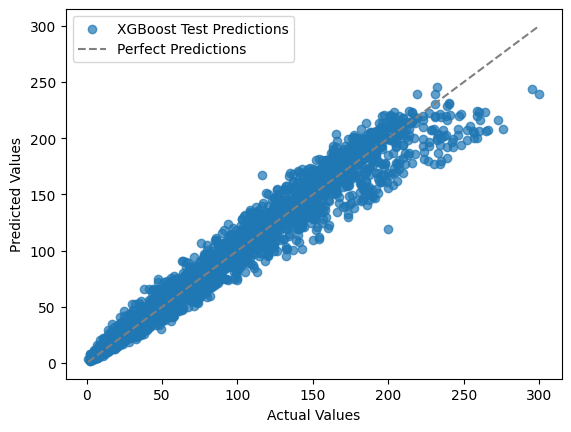

In [ ]:
# Scatter plot for XGBoost predictions
plt.scatter(Y_test, test_data_predictionXGB, label='XGBoost Test Predictions', alpha=0.7)

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

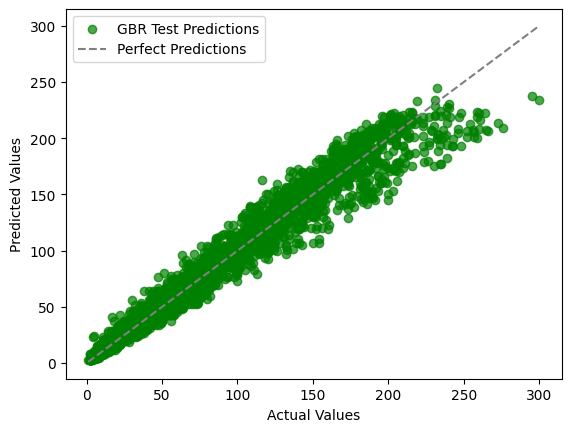

In [ ]:
# Scatter plot for Gradient Boosting predictions
plt.scatter(Y_test, test_data_predictionGBR, label='GBR Test Predictions', alpha=0.7, color='green')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

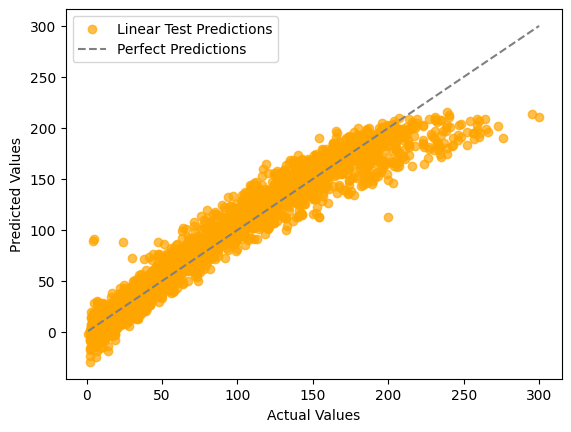

In [ ]:
# Scatter plot for Linear Regression predictions
plt.scatter(Y_test, test_data_predictionLinear, label='Linear Test Predictions', alpha=0.7, color='orange')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

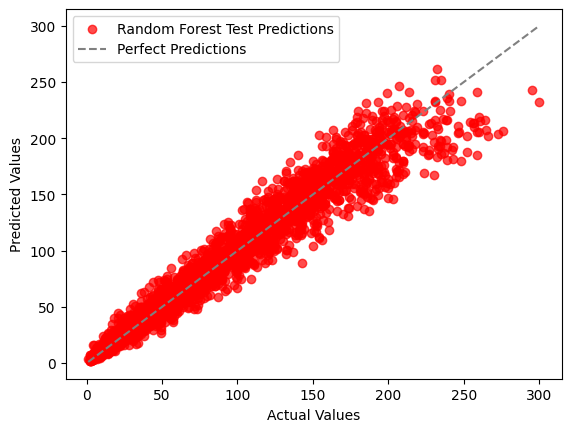

In [ ]:
# Scatter plot for Random Forest Regression predictions
plt.scatter(Y_test, test_data_predictionRF, label='Random Forest Test Predictions', alpha=0.7, color='red')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

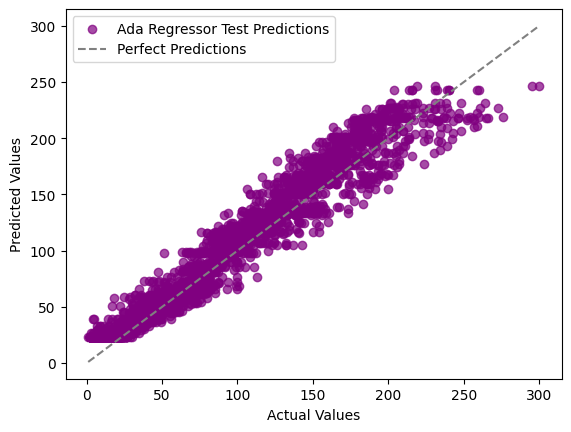

In [ ]:
# Scatter plot for Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionAda, label='Ada Regressor Test Predictions', alpha=0.7, color='purple')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

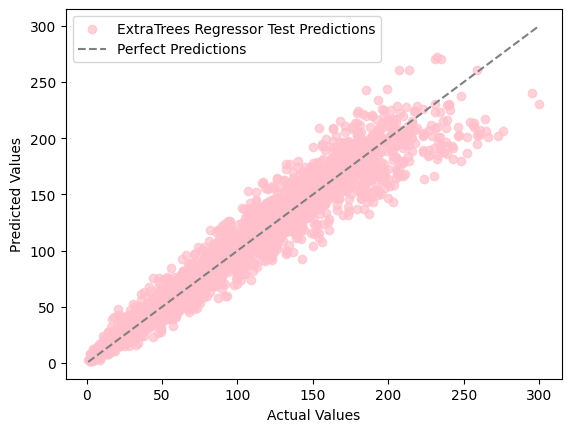

In [ ]:
# Scatter plot for Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionExtraTrees, label='ExtraTrees Regressor Test Predictions', alpha=0.7, color='pink')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

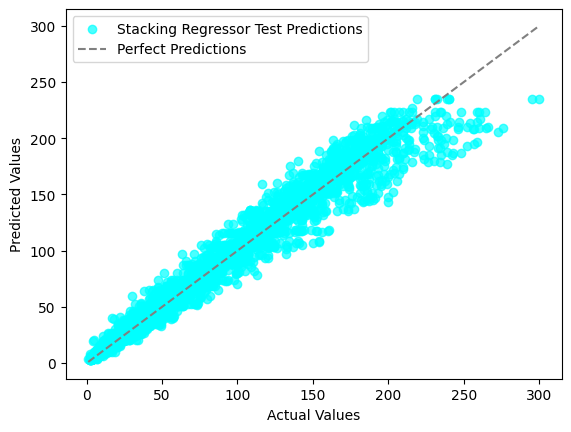

In [ ]:
# Scatter plot for Stacking Regression predictions
plt.scatter(Y_test, test_data_predictionStacking, label='Stacking Regressor Test Predictions', alpha=0.7, color='cyan')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

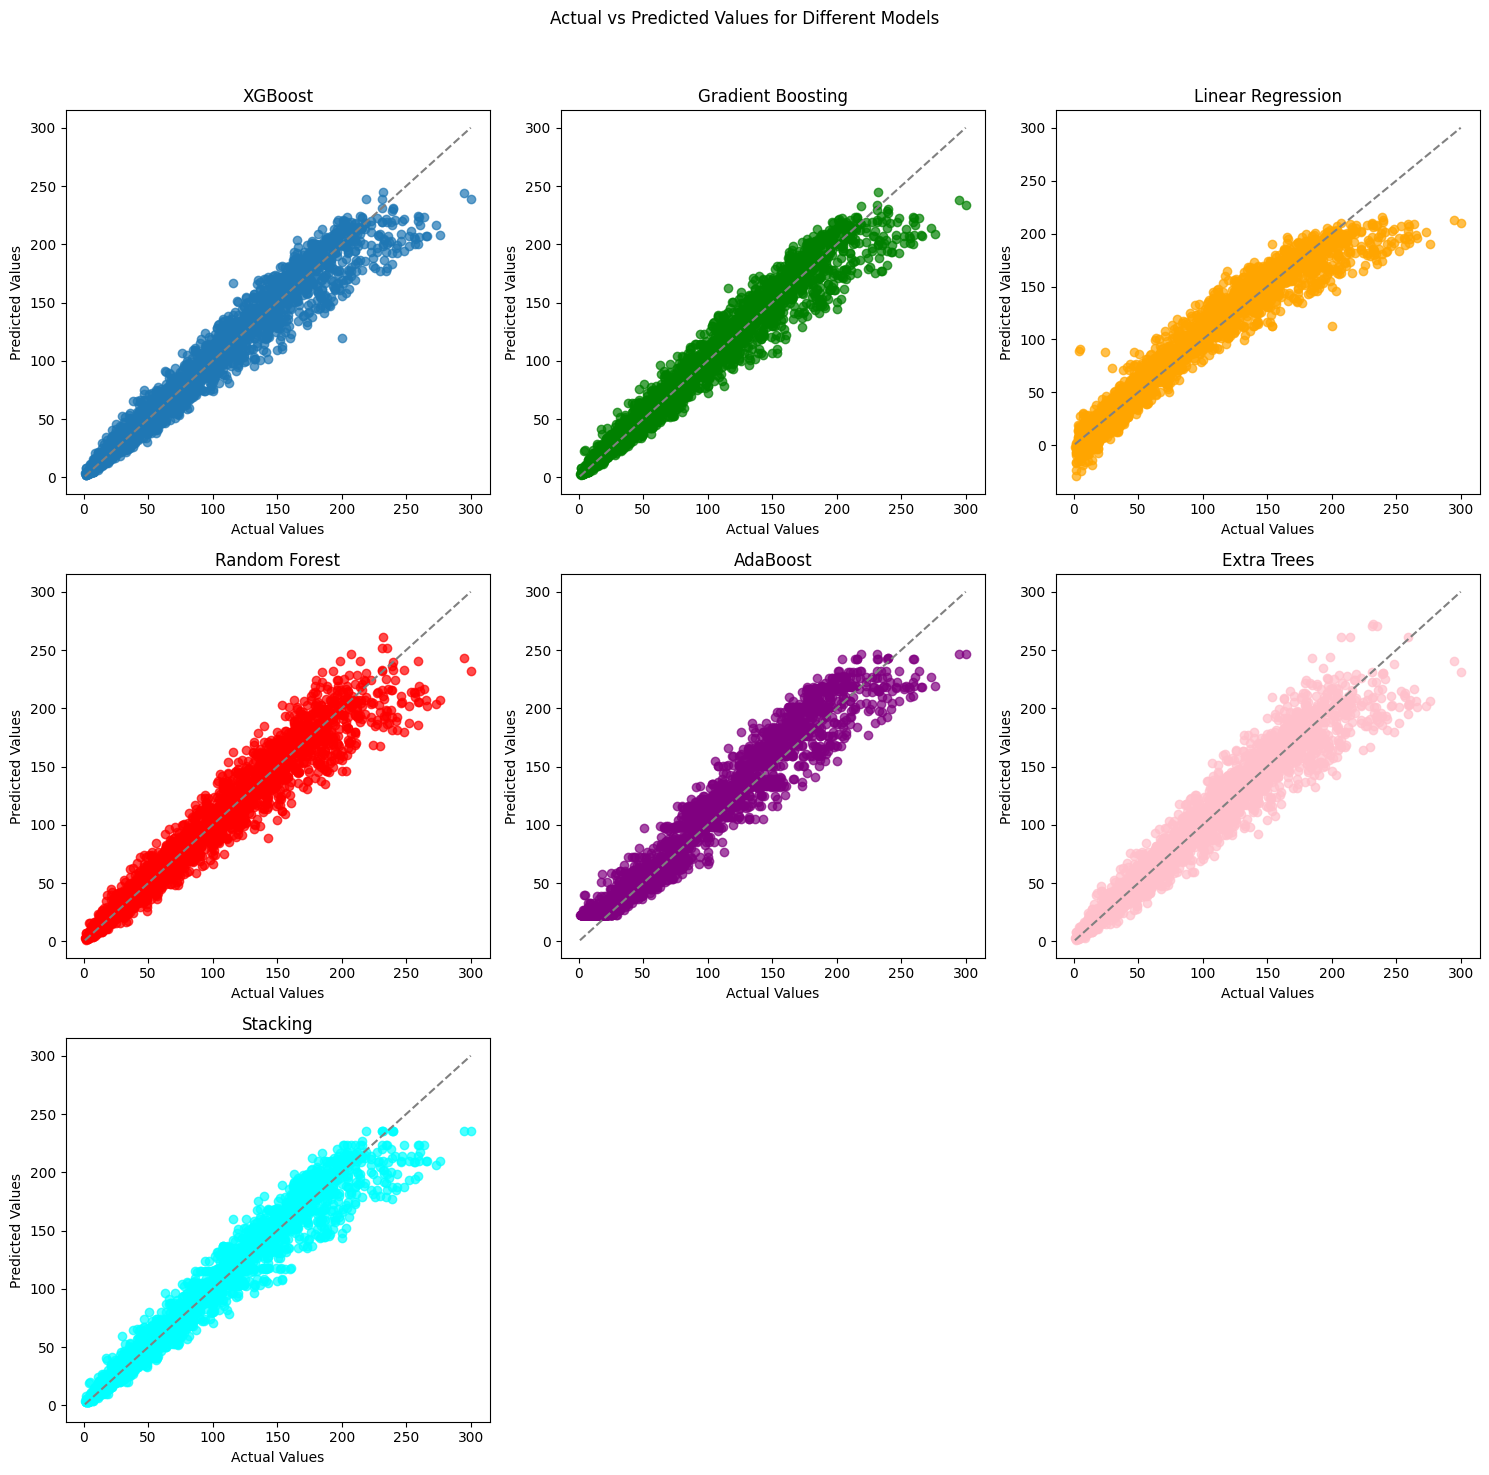

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Actual vs Predicted Values for Different Models')

# Scatter plots
axes[0, 0].scatter(Y_test, test_data_predictionXGB, label='XGBoost', alpha=0.7)
axes[0, 0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 0].set_title('XGBoost')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')

axes[0, 1].scatter(Y_test, test_data_predictionGBR, label='GBR', alpha=0.7, color='green')
axes[0, 1].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 1].set_title('Gradient Boosting')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')

axes[0, 2].scatter(Y_test, test_data_predictionLinear, label='Linear', alpha=0.7, color='orange')
axes[0, 2].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 2].set_title('Linear Regression')
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')

axes[1, 0].scatter(Y_test, test_data_predictionRF, label='Random Forest', alpha=0.7, color='red')
axes[1, 0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')

axes[1, 1].scatter(Y_test, test_data_predictionAda, label='AdaBoost', alpha=0.7, color='purple')
axes[1, 1].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 1].set_title('AdaBoost')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')

axes[1, 2].scatter(Y_test, test_data_predictionExtraTrees, label='Extra Trees', alpha=0.7, color='pink')
axes[1, 2].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 2].set_title('Extra Trees')
axes[1, 2].set_xlabel('Actual Values')
axes[1, 2].set_ylabel('Predicted Values')

axes[2, 0].scatter(Y_test, test_data_predictionStacking, label='Stacking', alpha=0.7, color='cyan')
axes[2, 0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[2, 0].set_title('Stacking')
axes[2, 0].set_xlabel('Actual Values')
axes[2, 0].set_ylabel('Predicted Values')

# Hide the empty subplot (if any)
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

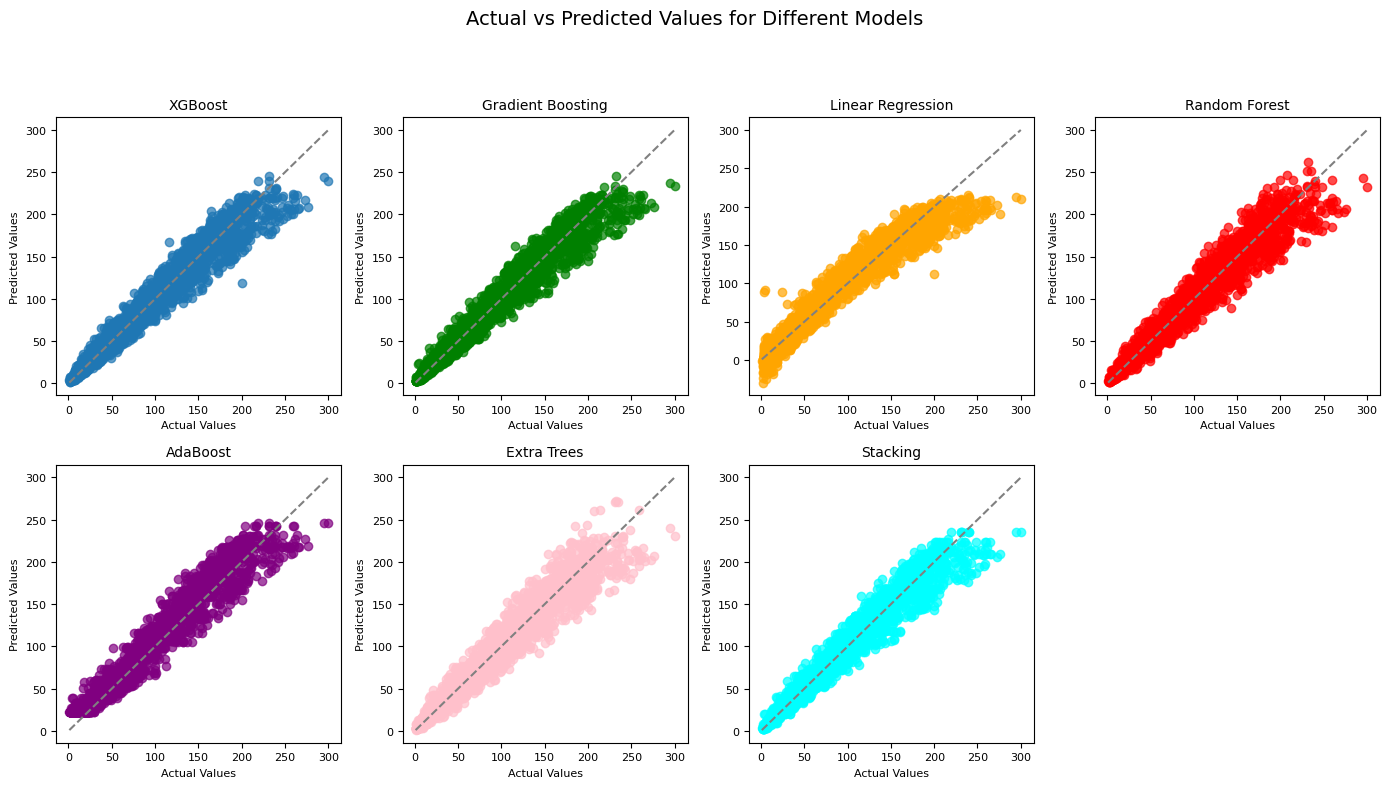

In [ ]:
# Create a figure with subplots arranged in 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(14, 8))  # Adjust the figure size for better fit
fig.suptitle('Actual vs Predicted Values for Different Models', fontsize=14)

# Scatter plots
axes[0, 0].scatter(Y_test, test_data_predictionXGB, label='XGBoost', alpha=0.7)
axes[0, 0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 0].set_title('XGBoost', fontsize=10)
axes[0, 0].set_xlabel('Actual Values', fontsize=8)
axes[0, 0].set_ylabel('Predicted Values', fontsize=8)
axes[0, 0].tick_params(axis='both', which='major', labelsize=8)

axes[0, 1].scatter(Y_test, test_data_predictionGBR, label='GBR', alpha=0.7, color='green')
axes[0, 1].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 1].set_title('Gradient Boosting', fontsize=10)
axes[0, 1].set_xlabel('Actual Values', fontsize=8)
axes[0, 1].set_ylabel('Predicted Values', fontsize=8)
axes[0, 1].tick_params(axis='both', which='major', labelsize=8)

axes[0, 2].scatter(Y_test, test_data_predictionLinear, label='Linear', alpha=0.7, color='orange')
axes[0, 2].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 2].set_title('Linear Regression', fontsize=10)
axes[0, 2].set_xlabel('Actual Values', fontsize=8)
axes[0, 2].set_ylabel('Predicted Values', fontsize=8)
axes[0, 2].tick_params(axis='both', which='major', labelsize=8)

axes[0, 3].scatter(Y_test, test_data_predictionRF, label='Random Forest', alpha=0.7, color='red')
axes[0, 3].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[0, 3].set_title('Random Forest', fontsize=10)
axes[0, 3].set_xlabel('Actual Values', fontsize=8)
axes[0, 3].set_ylabel('Predicted Values', fontsize=8)
axes[0, 3].tick_params(axis='both', which='major', labelsize=8)

axes[1, 0].scatter(Y_test, test_data_predictionAda, label='AdaBoost', alpha=0.7, color='purple')
axes[1, 0].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 0].set_title('AdaBoost', fontsize=10)
axes[1, 0].set_xlabel('Actual Values', fontsize=8)
axes[1, 0].set_ylabel('Predicted Values', fontsize=8)
axes[1, 0].tick_params(axis='both', which='major', labelsize=8)

axes[1, 1].scatter(Y_test, test_data_predictionExtraTrees, label='Extra Trees', alpha=0.7, color='pink')
axes[1, 1].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 1].set_title('Extra Trees', fontsize=10)
axes[1, 1].set_xlabel('Actual Values', fontsize=8)
axes[1, 1].set_ylabel('Predicted Values', fontsize=8)
axes[1, 1].tick_params(axis='both', which='major', labelsize=8)

axes[1, 2].scatter(Y_test, test_data_predictionStacking, label='Stacking', alpha=0.7, color='cyan')
axes[1, 2].plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray')
axes[1, 2].set_title('Stacking', fontsize=10)
axes[1, 2].set_xlabel('Actual Values', fontsize=8)
axes[1, 2].set_ylabel('Predicted Values', fontsize=8)
axes[1, 2].tick_params(axis='both', which='major', labelsize=8)

# Hide the empty subplot
axes[1, 3].axis('off')

# Adjust layout to minimize space usage
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


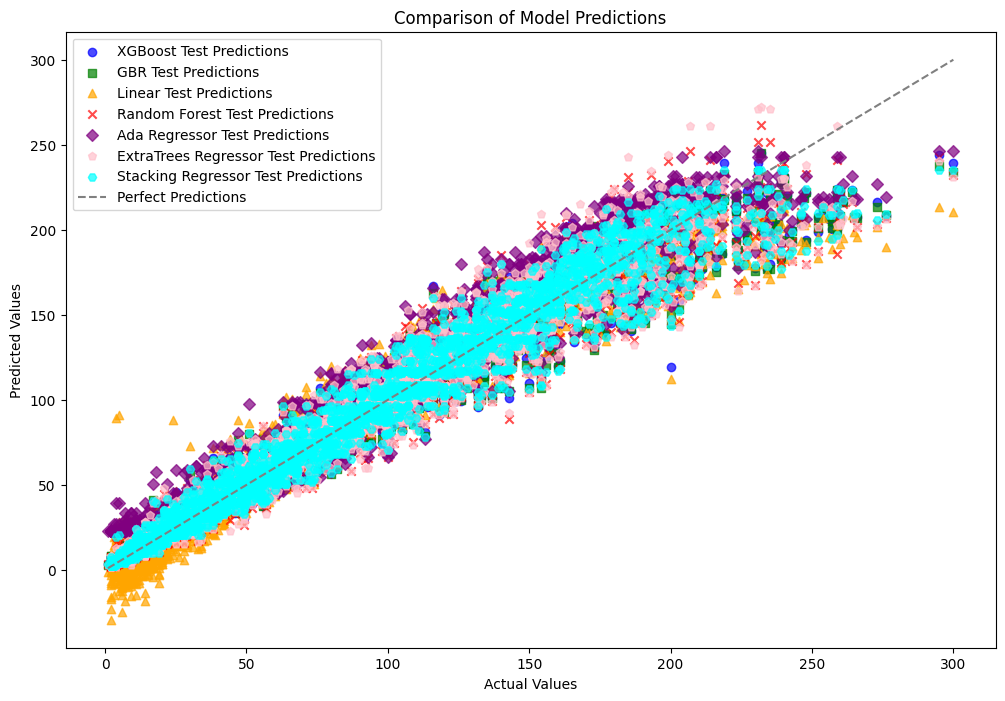

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for all models
plt.figure(figsize=(12, 8))

# XGBoost predictions
plt.scatter(Y_test, test_data_predictionXGB, label='XGBoost Test Predictions', alpha=0.7, color='blue', marker='o')

# Gradient Boosting predictions
plt.scatter(Y_test, test_data_predictionGBR, label='GBR Test Predictions', alpha=0.7, color='green', marker='s')

# Linear Regression predictions
plt.scatter(Y_test, test_data_predictionLinear, label='Linear Test Predictions', alpha=0.7, color='orange', marker='^')

# Random Forest Regression predictions
plt.scatter(Y_test, test_data_predictionRF, label='Random Forest Test Predictions', alpha=0.7, color='red', marker='x')

# Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionAda, label='Ada Regressor Test Predictions', alpha=0.7, color='purple', marker='D')

# Extra Trees Regressor predictions
plt.scatter(Y_test, test_data_predictionExtraTrees, label='ExtraTrees Regressor Test Predictions', alpha=0.7, color='pink', marker='p')

# Stacking Regression predictions
plt.scatter(Y_test, test_data_predictionStacking, label='Stacking Regressor Test Predictions', alpha=0.7, color='cyan', marker='H')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison of Model Predictions')

# Show the plot
plt.show()


<ipython-input-75-d8844fe58f80>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Y_test, test_data_predictionRF, label='Random Forest Test Predictions', alpha=0.6, color='red', marker='x', edgecolor='black', s=80)


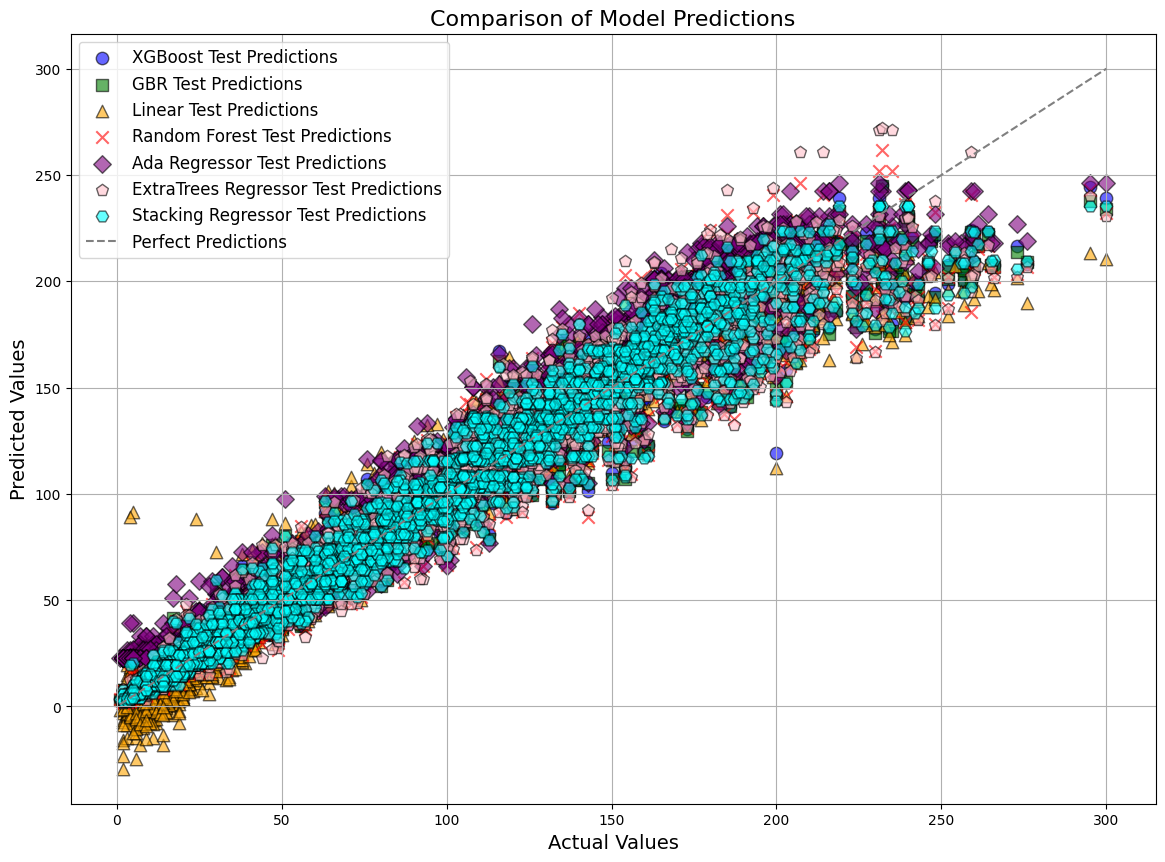

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(14, 10))

# XGBoost predictions
plt.scatter(Y_test, test_data_predictionXGB, label='XGBoost Test Predictions', alpha=0.6, color='blue', marker='o', edgecolor='black', s=80)

# Gradient Boosting predictions
plt.scatter(Y_test, test_data_predictionGBR, label='GBR Test Predictions', alpha=0.6, color='green', marker='s', edgecolor='black', s=80)

# Linear Regression predictions
plt.scatter(Y_test, test_data_predictionLinear, label='Linear Test Predictions', alpha=0.6, color='orange', marker='^', edgecolor='black', s=80)

# Random Forest Regression predictions
plt.scatter(Y_test, test_data_predictionRF, label='Random Forest Test Predictions', alpha=0.6, color='red', marker='x', edgecolor='black', s=80)

# Ada Boost Regression predictions
plt.scatter(Y_test, test_data_predictionAda, label='Ada Regressor Test Predictions', alpha=0.6, color='purple', marker='D', edgecolor='black', s=80)

# Extra Trees Regressor predictions
plt.scatter(Y_test, test_data_predictionExtraTrees, label='ExtraTrees Regressor Test Predictions', alpha=0.6, color='pink', marker='p', edgecolor='black', s=80)

# Stacking Regression predictions
plt.scatter(Y_test, test_data_predictionStacking, label='Stacking Regressor Test Predictions', alpha=0.6, color='cyan', marker='H', edgecolor='black', s=80)

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='gray', label='Perfect Predictions')

# Add labels, title, and legend
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Comparison of Model Predictions', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


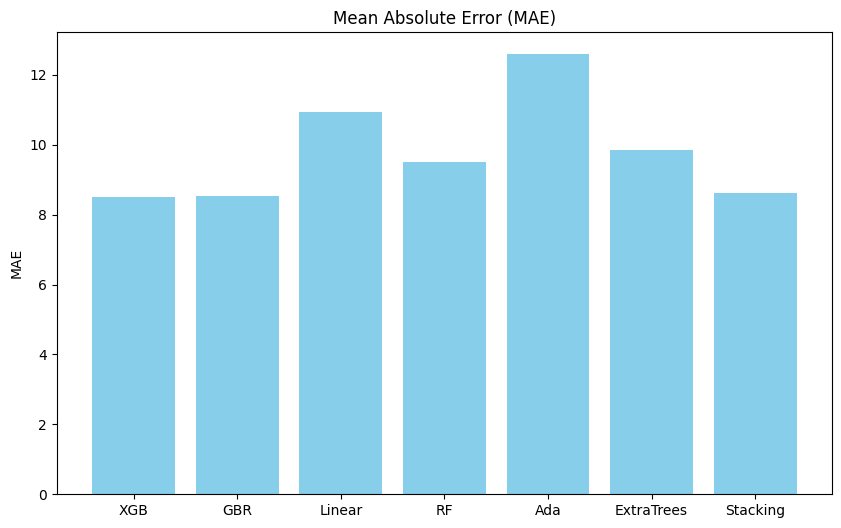

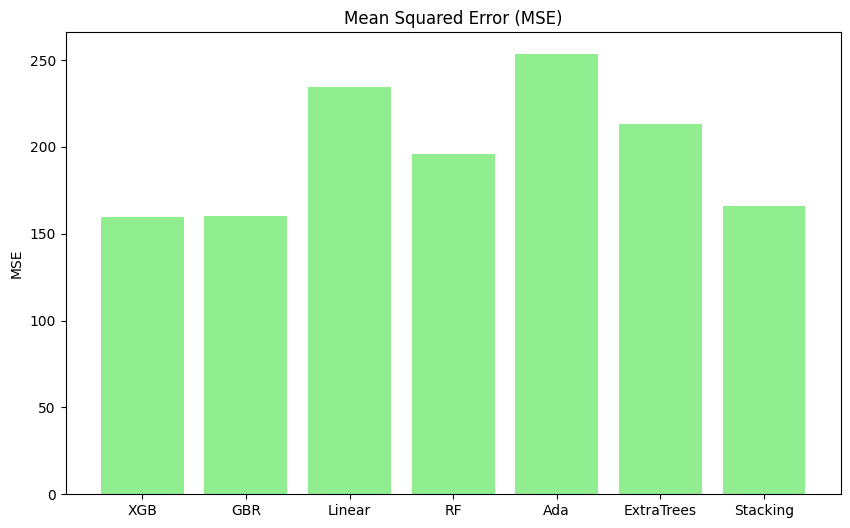

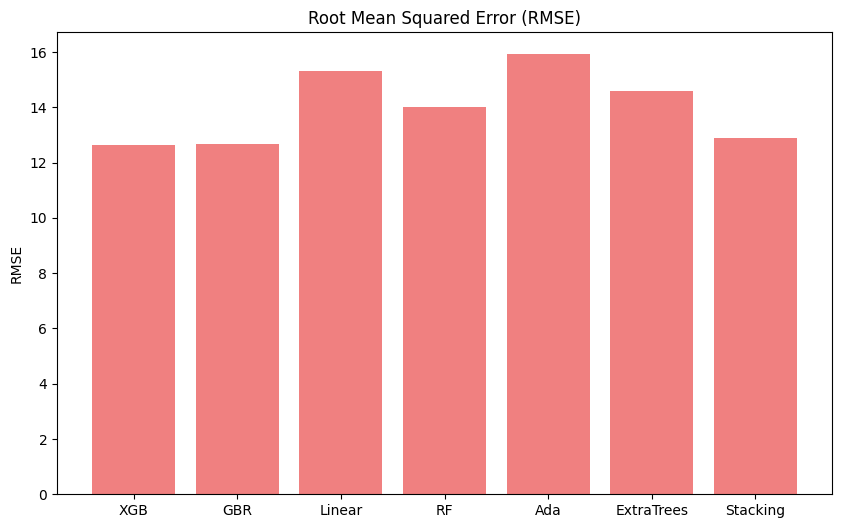

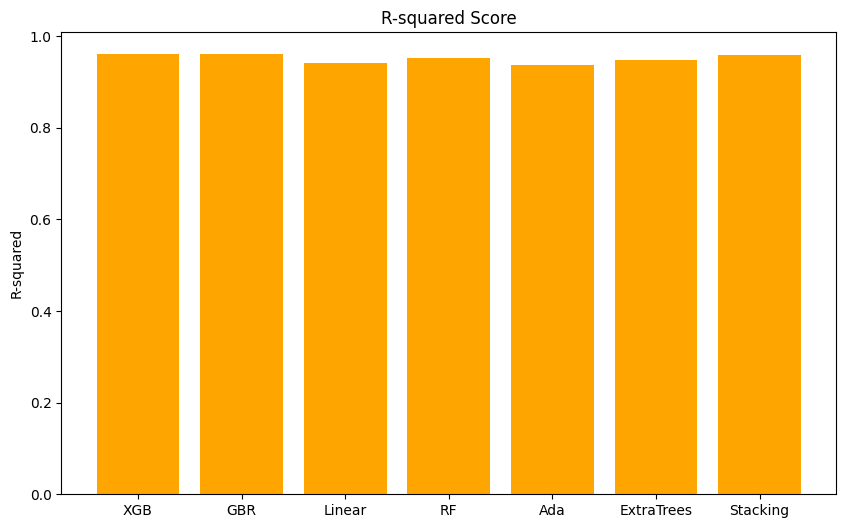

In [ ]:
# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='lightgreen')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='lightcoral')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.show()

# Plot R^2 Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='orange')
plt.title('R-squared Score')
plt.ylabel('R-squared')
plt.show()

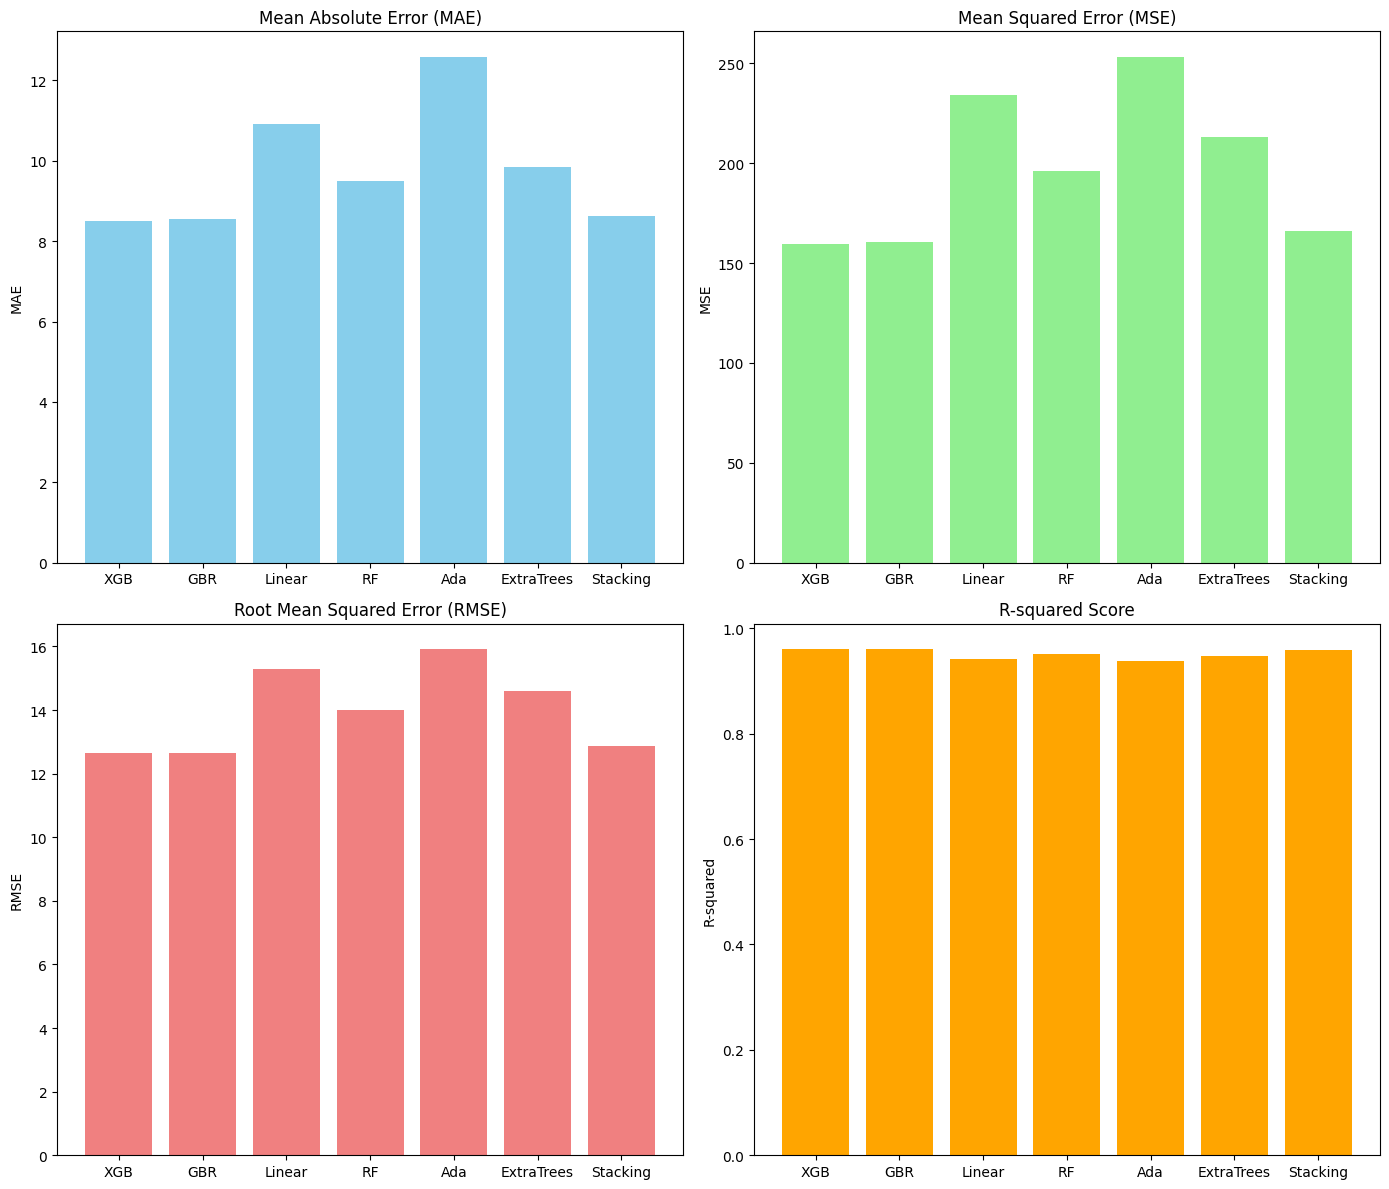

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# MAE
axes[0, 0].bar(models, mae, color='skyblue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE
axes[0, 1].bar(models, mse, color='lightgreen')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE
axes[1, 0].bar(models, rmse, color='lightcoral')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R^2 Score
axes[1, 1].bar(models, r2, color='orange')
axes[1, 1].set_title('R-squared Score')
axes[1, 1].set_ylabel('R-squared')

plt.tight_layout()
plt.show()

        Model        MAE         MSE       RMSE       R^2
0         XGB   8.494312  159.642488  12.634971  0.960290
1         GBR   8.538766  160.313150  12.661483  0.960123
2      Linear  10.924100  234.283174  15.306312  0.941723
3          RF   9.504067  196.183512  14.006552  0.951200
4         Ada  12.587315  253.342402  15.916733  0.936982
5  ExtraTrees   9.845690  213.086343  14.597477  0.946996
6    Stacking   8.613033  165.873153  12.879175  0.958740


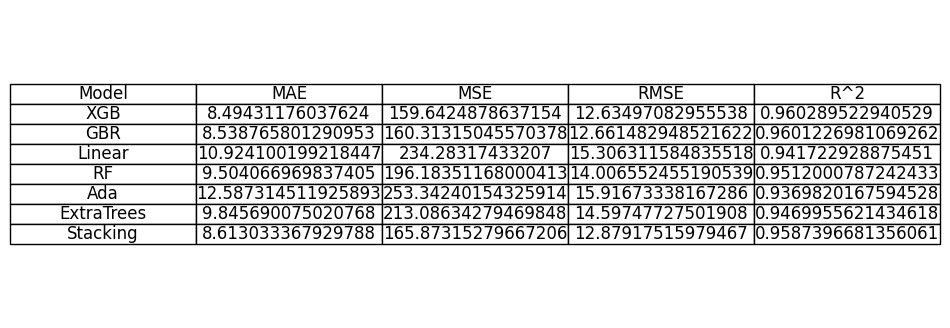

In [ ]:
# Create a DataFrame with all the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R^2': r2
})

print(metrics_df)

# Display as a table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

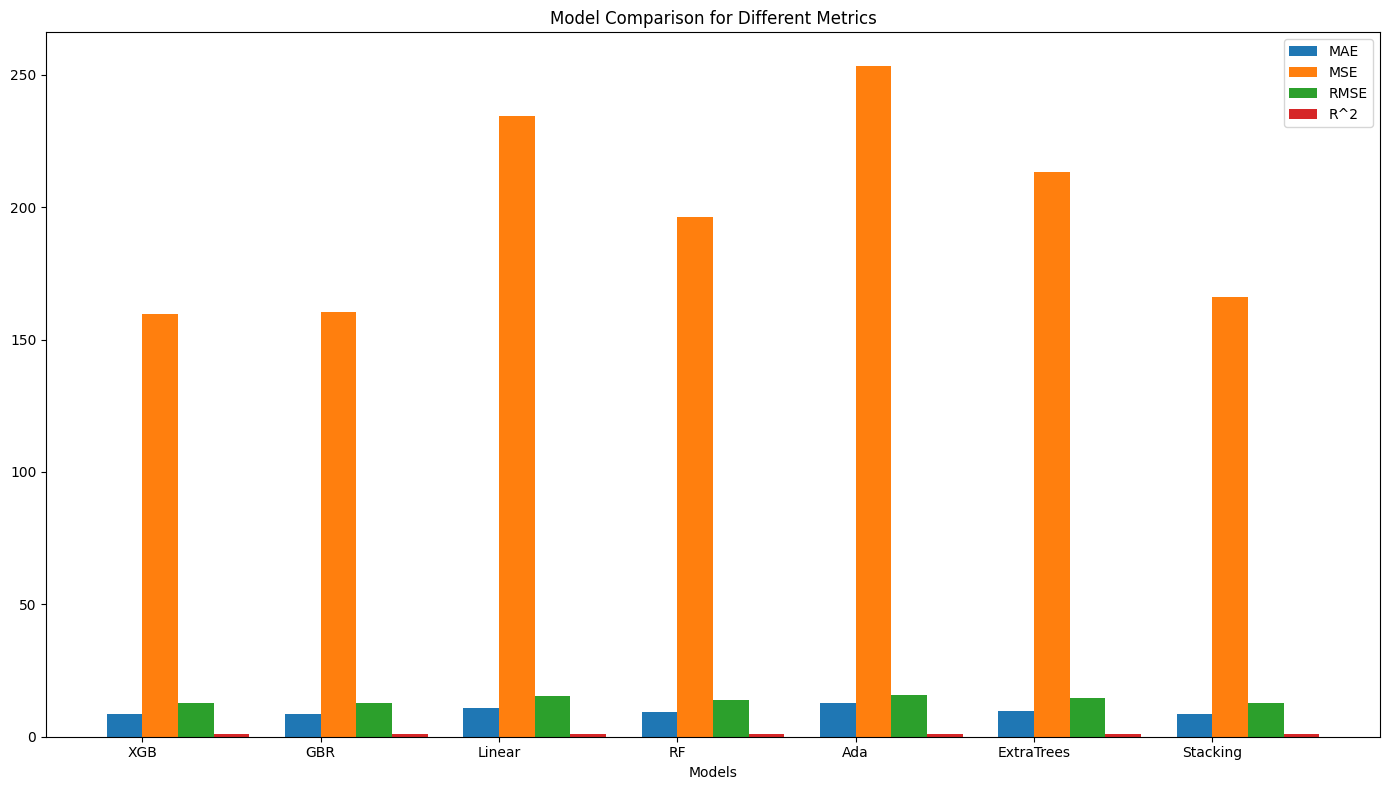

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Combine the metrics into a single array
metrics = np.array([mae, mse, rmse, r2])
metric_names = ['MAE', 'MSE', 'RMSE', 'R^2']

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
for i in range(len(metric_names)):
    ax.bar(x + i*width, metrics[i], width, label=metric_names[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Model Comparison for Different Metrics')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


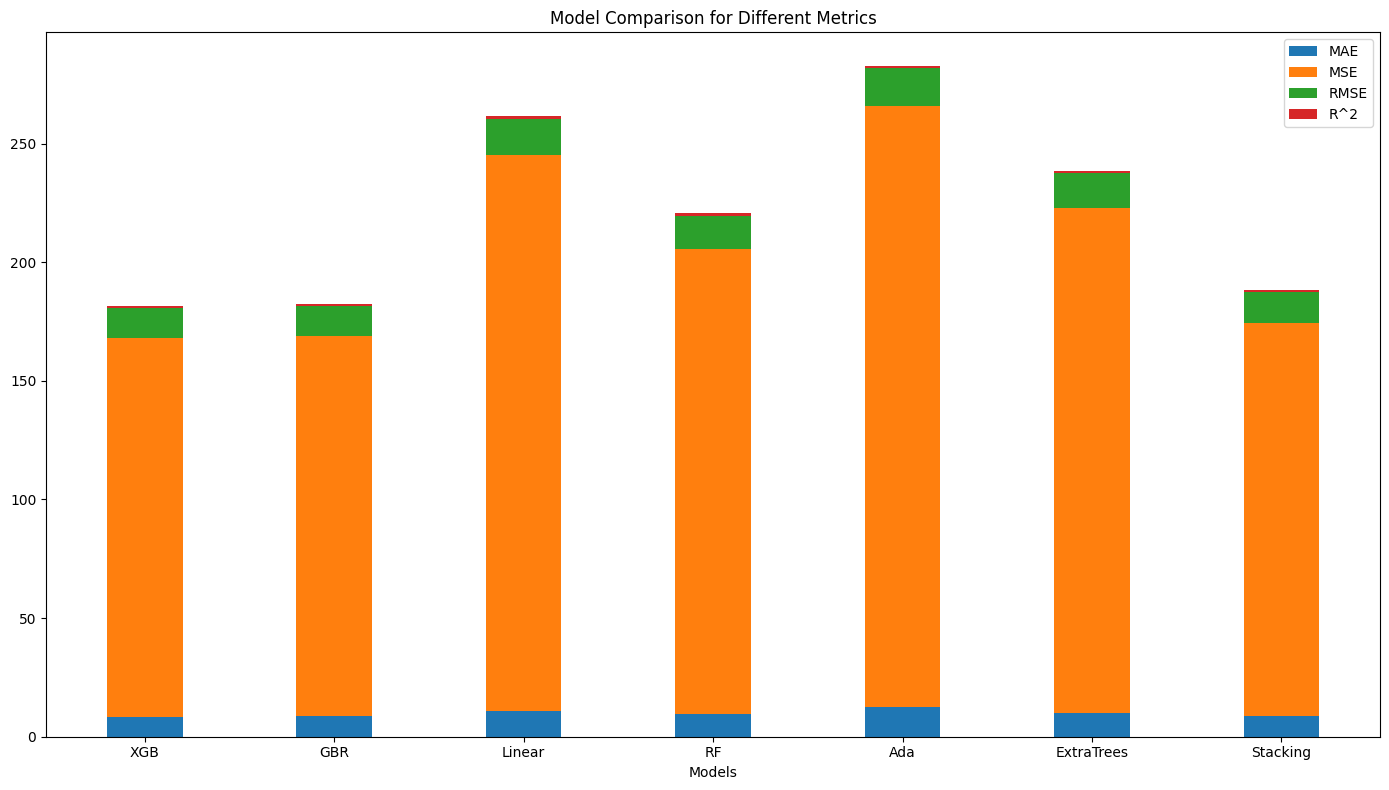

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Combine the metrics into a single array
metrics = np.array([mae, mse, rmse, r2])
metric_names = ['MAE', 'MSE', 'RMSE', 'R^2']

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.4

# Stack the bars
bottom = np.zeros(len(models))
for i, metric in enumerate(metrics):
    ax.bar(models, metric, bar_width, label=metric_names[i], bottom=bottom)
    bottom += metric

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Model Comparison for Different Metrics')
ax.legend()

fig.tight_layout()

plt.show()


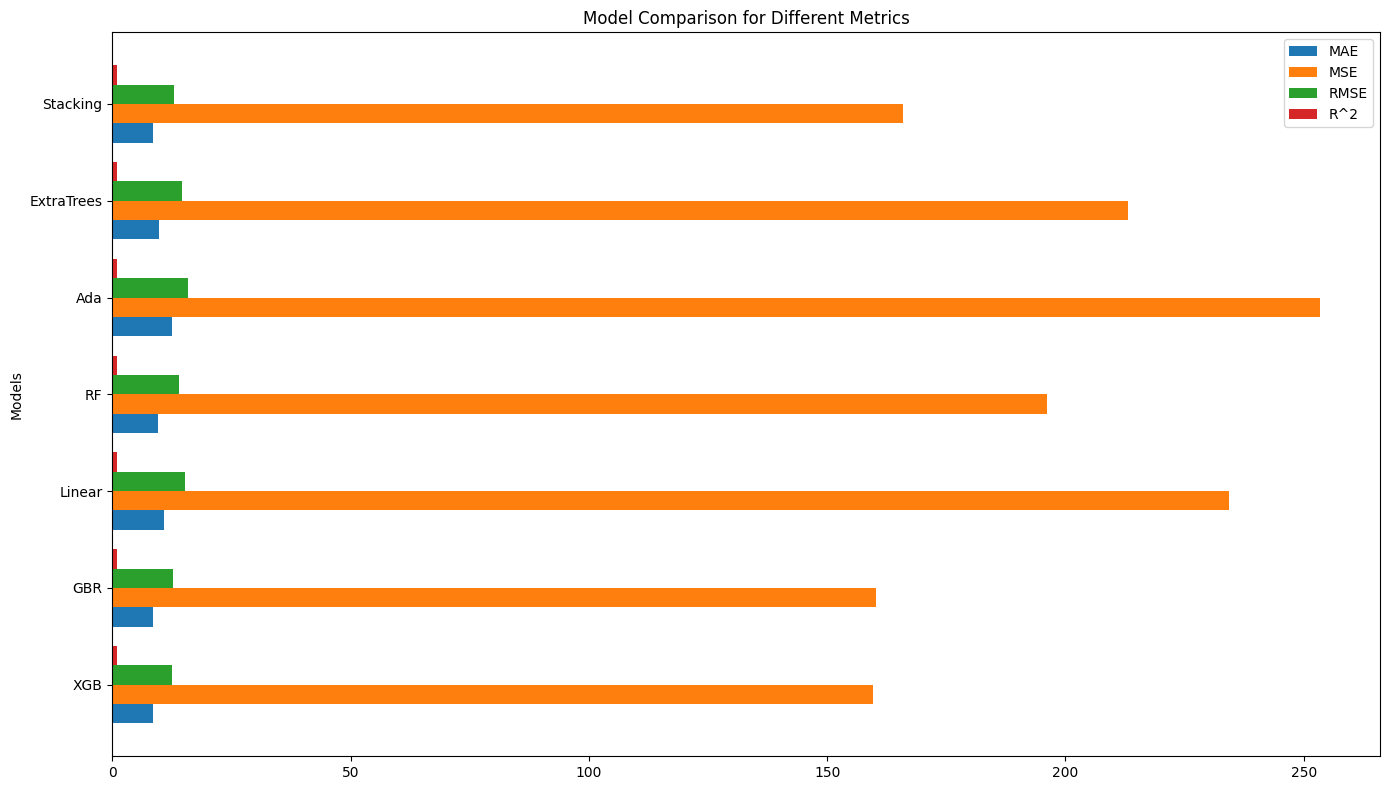

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Combine the metrics into a single array
metrics = np.array([mae, mse, rmse, r2])
metric_names = ['MAE', 'MSE', 'RMSE', 'R^2']

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
for i in range(len(metric_names)):
    ax.barh(x + i*width, metrics[i], width, label=metric_names[i])

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Models')
ax.set_title('Model Comparison for Different Metrics')
ax.set_yticks(x + width * 1.5)
ax.set_yticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


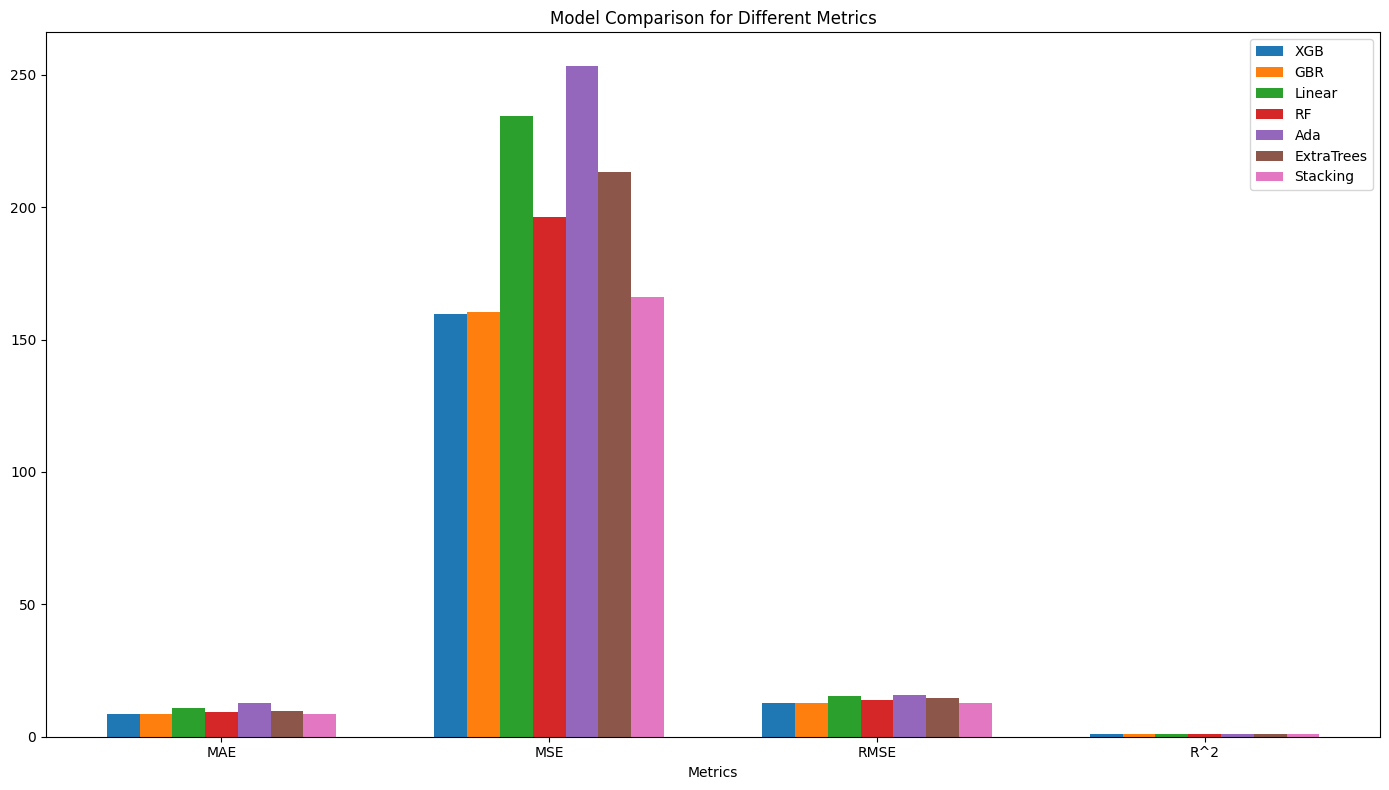

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Combine the metrics into a single array
metrics = [mae, mse, rmse, r2]
metric_names = ['MAE', 'MSE', 'RMSE', 'R^2']

# Plotting
x = np.arange(len(metric_names))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
for i, model in enumerate(models):
    ax.bar(x + i*width, [mae[i], mse[i], rmse[i], r2[i]], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison for Different Metrics')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metric_names)
ax.legend()

fig.tight_layout()

plt.show()


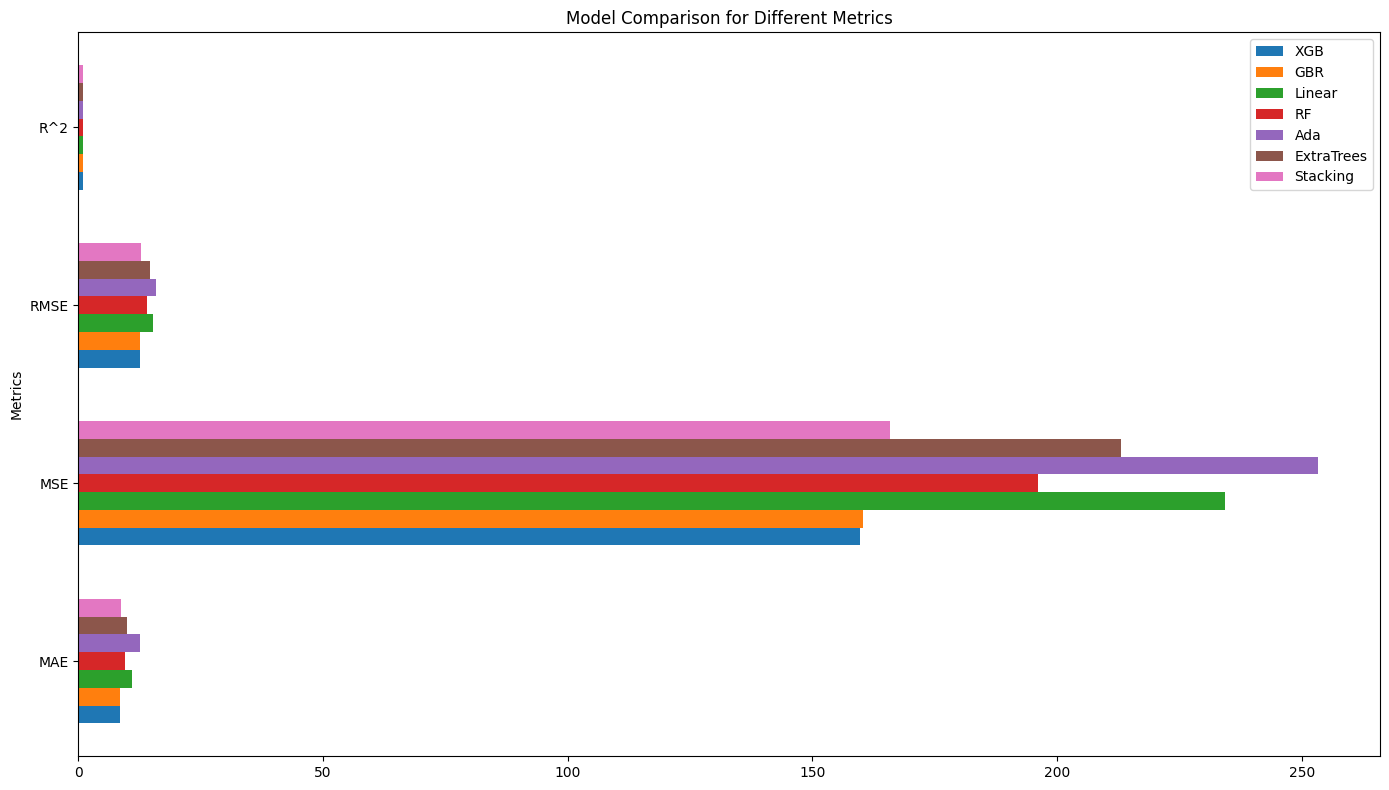

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define the metrics
mae = [maeXGB, maeGBR, maeLinear, maeRF, maeAda, maeExtraTrees, maeStacking]
mse = [mseXGB, mseGBR, mseLinear, mseRF, mseAda, mseExtraTrees, mseStacking]
rmse = [rmseXGB, rmseGBR, rmseLinear, rmseRF, rmseAda, rmseExtraTrees, rmseStacking]
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Combine the metrics into a single array
metrics = [mae, mse, rmse, r2]
metric_names = ['MAE', 'MSE', 'RMSE', 'R^2']

# Plotting
x = np.arange(len(metric_names))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
for i, model in enumerate(models):
    ax.barh(x + i*width, [mae[i], mse[i], rmse[i], r2[i]], width, label=model)

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Model Comparison for Different Metrics')
ax.set_yticks(x + width * (len(models) - 1) / 2)
ax.set_yticklabels(metric_names)
ax.legend()

fig.tight_layout()

plt.show()


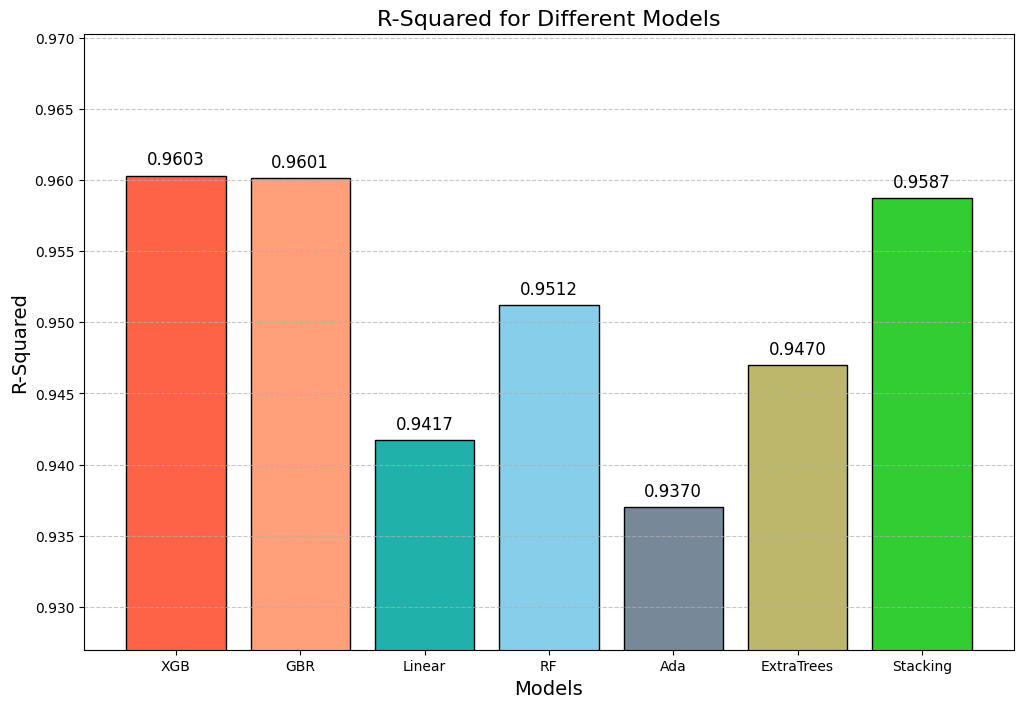

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['XGB', 'GBR', 'Linear', 'RF', 'Ada', 'ExtraTrees', 'Stacking']

# Define R-squared values
r2 = [r2scoreXGB_test, r2scoreGBR_test, r2scoreLinear_test, r2scoreRF_test, r2scoreAda_test, r2scoreExtraTrees_test, r2scoreStacking_test]

# Define colors
colors = ['#FF6347', '#FFA07A', '#20B2AA', '#87CEEB', '#778899', '#BDB76B', '#32CD32']

# Simple Bar Plot with Adjusted Y-Axis
plt.figure(figsize=(12, 8))
bars = plt.bar(models, r2, color=colors, edgecolor='black')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-Squared', fontsize=14)
plt.title('R-Squared for Different Models', fontsize=16)
plt.ylim(min(r2) - 0.01, max(r2) + 0.01)  # Adjusting the y-axis to zoom in
for bar, value in zip(bars, r2):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.0005, f"{value:.4f}", ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


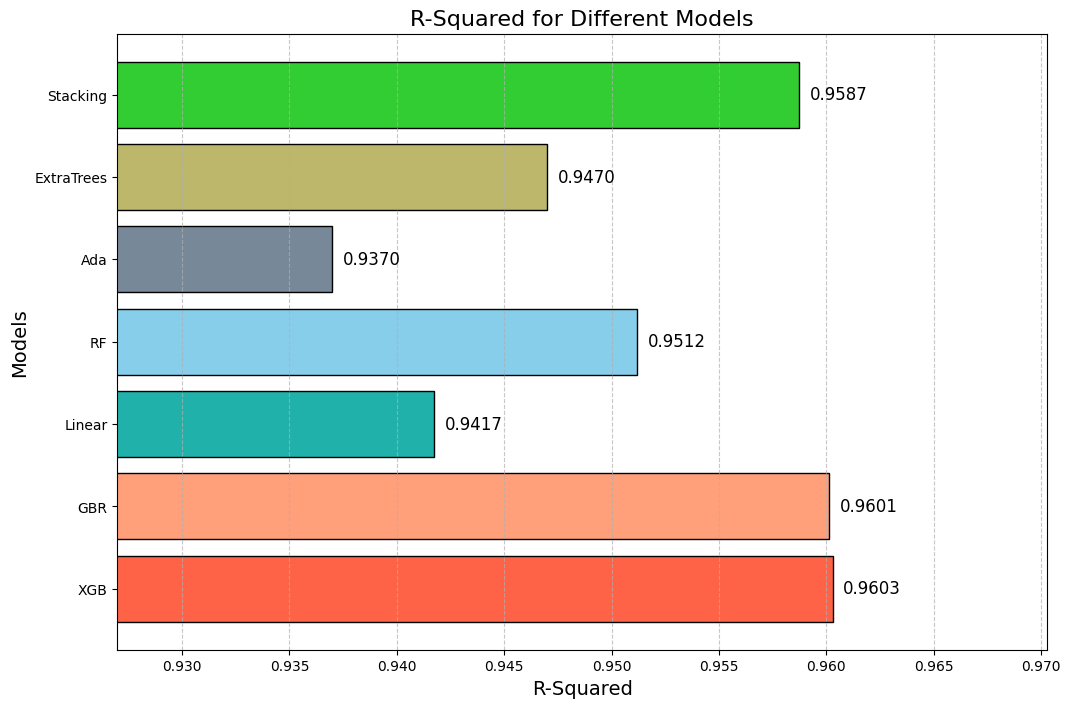

In [ ]:
# Horizontal Bar Plot with Adjusted X-Axis
plt.figure(figsize=(12, 8))
bars = plt.barh(models, r2, color=colors, edgecolor='black')
plt.xlabel('R-Squared', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.title('R-Squared for Different Models', fontsize=16)
plt.xlim(min(r2) - 0.01, max(r2) + 0.01)  # Adjusting the x-axis to zoom in
for bar, value in zip(bars, r2):
    plt.text(value + 0.0005, bar.get_y() + bar.get_height() / 2, f"{value:.4f}", va='center', ha='left', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


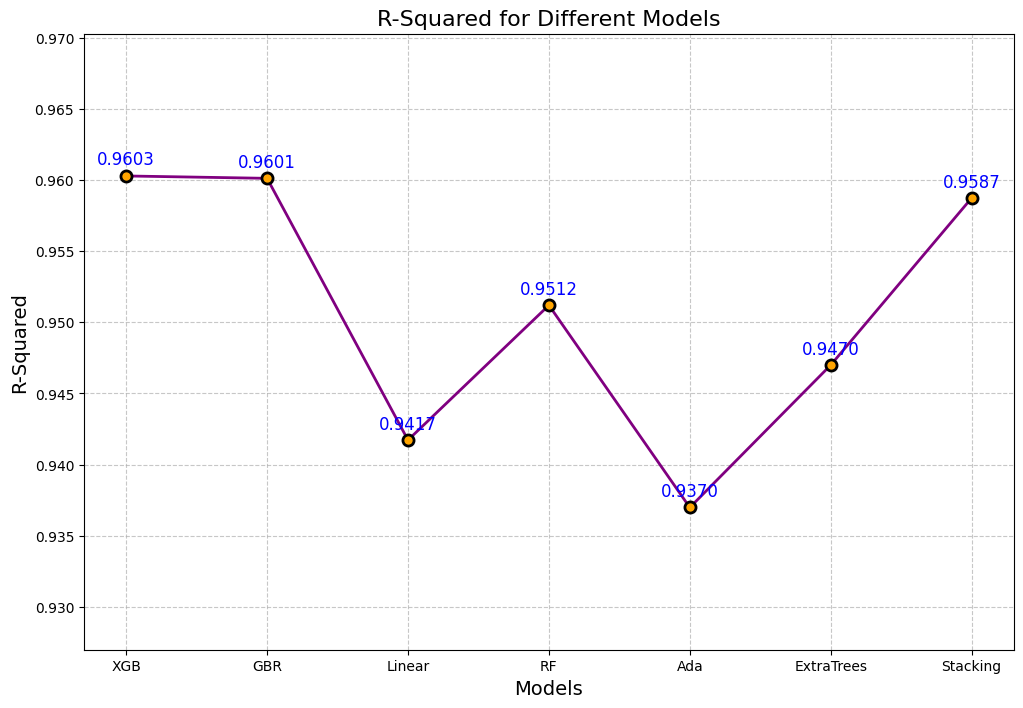

In [ ]:
# Scatter Plot with Line and Adjusted Y-Axis
plt.figure(figsize=(12, 8))
plt.plot(models, r2, marker='o', linestyle='-', color='purple', linewidth=2, markersize=8, markerfacecolor='orange', markeredgewidth=2, markeredgecolor='black')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-Squared', fontsize=14)
plt.title('R-Squared for Different Models', fontsize=16)
plt.ylim(min(r2) - 0.01, max(r2) + 0.01)  # Adjusting the y-axis to zoom in
plt.grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(r2):
    plt.text(i, value + 0.0005, f"{value:.4f}", ha='center', va='bottom', fontsize=12, color='blue')
plt.show()
